In [1]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [4]:
numpy.random.seed(7)

In [5]:
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [6]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [7]:
look_back = 5 # скорректированно
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [8]:
# заменили оптимайзер на 'nadam'
# прибавили кол-во эпох до 5
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='nadam')
for i in range(100):
    model.fit(trainX, trainY, epochs=5, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()

Epoch 1/5
90/90 - 1s - loss: 0.0084 - 1s/epoch - 16ms/step
Epoch 2/5
90/90 - 0s - loss: 0.0123 - 105ms/epoch - 1ms/step
Epoch 3/5
90/90 - 0s - loss: 0.0099 - 91ms/epoch - 1ms/step
Epoch 4/5
90/90 - 0s - loss: 0.0083 - 101ms/epoch - 1ms/step
Epoch 5/5
90/90 - 0s - loss: 0.0073 - 93ms/epoch - 1ms/step
Epoch 1/5
90/90 - 0s - loss: 0.0064 - 108ms/epoch - 1ms/step
Epoch 2/5
90/90 - 0s - loss: 0.0062 - 92ms/epoch - 1ms/step
Epoch 3/5
90/90 - 0s - loss: 0.0059 - 100ms/epoch - 1ms/step
Epoch 4/5
90/90 - 0s - loss: 0.0057 - 100ms/epoch - 1ms/step
Epoch 5/5
90/90 - 0s - loss: 0.0055 - 100ms/epoch - 1ms/step
Epoch 1/5
90/90 - 0s - loss: 0.0051 - 108ms/epoch - 1ms/step
Epoch 2/5
90/90 - 0s - loss: 0.0052 - 106ms/epoch - 1ms/step
Epoch 3/5
90/90 - 0s - loss: 0.0051 - 87ms/epoch - 967us/step
Epoch 4/5
90/90 - 0s - loss: 0.0050 - 107ms/epoch - 1ms/step
Epoch 5/5
90/90 - 0s - loss: 0.0049 - 91ms/epoch - 1ms/step
Epoch 1/5
90/90 - 0s - loss: 0.0046 - 100ms/epoch - 1ms/step
Epoch 2/5
90/90 - 0s - loss: 

Epoch 1/5
90/90 - 0s - loss: 0.0020 - 95ms/epoch - 1ms/step
Epoch 2/5
90/90 - 0s - loss: 0.0020 - 100ms/epoch - 1ms/step
Epoch 3/5
90/90 - 0s - loss: 0.0020 - 84ms/epoch - 938us/step
Epoch 4/5
90/90 - 0s - loss: 0.0020 - 104ms/epoch - 1ms/step
Epoch 5/5
90/90 - 0s - loss: 0.0020 - 111ms/epoch - 1ms/step
Epoch 1/5
90/90 - 0s - loss: 0.0020 - 128ms/epoch - 1ms/step
Epoch 2/5
90/90 - 0s - loss: 0.0020 - 108ms/epoch - 1ms/step
Epoch 3/5
90/90 - 0s - loss: 0.0020 - 101ms/epoch - 1ms/step
Epoch 4/5
90/90 - 0s - loss: 0.0019 - 109ms/epoch - 1ms/step
Epoch 5/5
90/90 - 0s - loss: 0.0019 - 137ms/epoch - 2ms/step
Epoch 1/5
90/90 - 0s - loss: 0.0020 - 116ms/epoch - 1ms/step
Epoch 2/5
90/90 - 0s - loss: 0.0019 - 125ms/epoch - 1ms/step
Epoch 3/5
90/90 - 0s - loss: 0.0019 - 108ms/epoch - 1ms/step
Epoch 4/5
90/90 - 0s - loss: 0.0019 - 103ms/epoch - 1ms/step
Epoch 5/5
90/90 - 0s - loss: 0.0019 - 100ms/epoch - 1ms/step
Epoch 1/5
90/90 - 0s - loss: 0.0019 - 95ms/epoch - 1ms/step
Epoch 2/5
90/90 - 0s - lo

Epoch 1/5
90/90 - 0s - loss: 0.0017 - 100ms/epoch - 1ms/step
Epoch 2/5
90/90 - 0s - loss: 0.0018 - 85ms/epoch - 944us/step
Epoch 3/5
90/90 - 0s - loss: 0.0018 - 107ms/epoch - 1ms/step
Epoch 4/5
90/90 - 0s - loss: 0.0018 - 100ms/epoch - 1ms/step
Epoch 5/5
90/90 - 0s - loss: 0.0018 - 84ms/epoch - 937us/step
Epoch 1/5
90/90 - 0s - loss: 0.0017 - 89ms/epoch - 994us/step
Epoch 2/5
90/90 - 0s - loss: 0.0018 - 100ms/epoch - 1ms/step
Epoch 3/5
90/90 - 0s - loss: 0.0018 - 100ms/epoch - 1ms/step
Epoch 4/5
90/90 - 0s - loss: 0.0018 - 89ms/epoch - 986us/step
Epoch 5/5
90/90 - 0s - loss: 0.0018 - 96ms/epoch - 1ms/step
Epoch 1/5
90/90 - 0s - loss: 0.0017 - 99ms/epoch - 1ms/step
Epoch 2/5
90/90 - 0s - loss: 0.0018 - 84ms/epoch - 937us/step
Epoch 3/5
90/90 - 0s - loss: 0.0018 - 98ms/epoch - 1ms/step
Epoch 4/5
90/90 - 0s - loss: 0.0017 - 111ms/epoch - 1ms/step
Epoch 5/5
90/90 - 0s - loss: 0.0017 - 97ms/epoch - 1ms/step
Epoch 1/5
90/90 - 0s - loss: 0.0017 - 99ms/epoch - 1ms/step
Epoch 2/5
90/90 - 0s - l

Epoch 1/5
90/90 - 0s - loss: 0.0017 - 97ms/epoch - 1ms/step
Epoch 2/5
90/90 - 0s - loss: 0.0017 - 101ms/epoch - 1ms/step
Epoch 3/5
90/90 - 0s - loss: 0.0017 - 106ms/epoch - 1ms/step
Epoch 4/5
90/90 - 0s - loss: 0.0017 - 85ms/epoch - 941us/step
Epoch 5/5
90/90 - 0s - loss: 0.0017 - 100ms/epoch - 1ms/step
Epoch 1/5
90/90 - 0s - loss: 0.0017 - 105ms/epoch - 1ms/step
Epoch 2/5
90/90 - 0s - loss: 0.0017 - 86ms/epoch - 958us/step
Epoch 3/5
90/90 - 0s - loss: 0.0017 - 101ms/epoch - 1ms/step
Epoch 4/5
90/90 - 0s - loss: 0.0017 - 100ms/epoch - 1ms/step
Epoch 5/5
90/90 - 0s - loss: 0.0017 - 100ms/epoch - 1ms/step
Epoch 1/5
90/90 - 0s - loss: 0.0017 - 91ms/epoch - 1ms/step
Epoch 2/5
90/90 - 0s - loss: 0.0017 - 100ms/epoch - 1ms/step
Epoch 3/5
90/90 - 0s - loss: 0.0017 - 104ms/epoch - 1ms/step
Epoch 4/5
90/90 - 0s - loss: 0.0017 - 105ms/epoch - 1ms/step
Epoch 5/5
90/90 - 0s - loss: 0.0017 - 89ms/epoch - 994us/step
Epoch 1/5
90/90 - 0s - loss: 0.0017 - 114ms/epoch - 1ms/step
Epoch 2/5
90/90 - 0s - 

In [9]:
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

42/42 [==============================] - 0s 732us/step


In [10]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [11]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 21.90 RMSE
Test Score: 51.30 RMSE


In [12]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [13]:
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

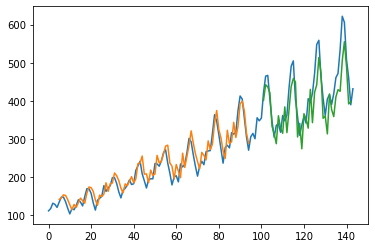

In [14]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Заметка

Нейросеть больше всего чувствительна к количеству эпох, выделенных под обучение.
Остальные параметры влияют слабо в плане улучшения качества. Сеть не стабильна,
т.к. при одних и тех же параметрах показывает различные оценки качества.